# Tarefa 2 - Heart Attack Risk Prediction

### O Dataset
O Dataset <em>heart_attack_prediction_dataset.csv</em> tem como objetivo explorar as dinâmicas que influenciam a saúde do coração e os fatores que o preditam. 

Este dataset é constituído pelos seguintes parâmetros:

- **Patient ID** - Identificador único para cada paciente;

- **Age** - Idade do paciente;
- **Sex** - Género do paciente (Male/Female);
- **Cholesterol** - Níveis de colesterol do paciente;
- **Blood Pressure** - Pressão sanguínea do paciente (systolic/diastolic);
- **Heart Rate** - Frequência cardíaca do paciente;
- **Diabetes** - Se o paciente tem diabetes (Yes/No);
- **Family History** - Histórico familiar de doenças cardíacas (1: Sim, 0: Não);
- **Smoking** - Estado de fumador do paciente (1: Fumador, 0: Não Fumador);
- **Obesity** - Estado de obesidade do paciente (1: Obeso, 0: Não obeso);
- **Alcohol Consumption** - Nível de consumo de alcóol pelo paciente (None/Light/Moderate/Heavy);
- **Exercise Hours Per Week** - Número de horas de exercício por semana;
- **Diet** - Hábitos de alimentação do paciente (Healthy/Average/Unhealthy);
- **Previous Heart Problems** - Existência de histórico de problemas cardíacos (1: Sim, 0: Não);
- **Medication Use** - Uso de medicação por parte do paciente (1: Sim, 0: Não);
- **Stress Level** - Níveis de stress reportados pelo paciente (1-10);
- **Sedentary Hours Per Day** - Horas de atividade sedentária por dia;
- **Income** - Nível de rendimento do paciente;
- **BMI** - Índice de massa corporal do paciente;
- **Triglycerides** - Níveis de triglicerídeos do paciente;
- **Physical Activity Days Per Week** - Dias de atividade física por semana;
- **Sleep Hours Per Day** - Horas de sono por dia;
- **Country** - País do paciente;
- **Continent** - Continente onde o paciente reside;
- **Hemisphere** - Hemisfério onde o paciente reside;
- **Heart Attack Risk** - Presença de risco de ataque cardíaco (1 : Sim, 0: Não);

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the data

Iniciamos o estudo do dataset pelo load dos dados numa dataframe panda.

In [2]:
data = pd.read_csv('heart_attack_prediction_dataset.csv')

Imprimimos as primeiras linhas do dataframe.

In [3]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Imprimimos as últimas linhas do dataframe:

In [4]:
data.tail()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0
8762,ZWN9666,25,Female,356,138/67,75,1,1,0,0,...,9.005234,247338,32.914151,180,7,4,United Kingdom,Europe,Northern Hemisphere,1


De forma a verificarmos quantas entradas e atributos o dataset possui:

In [5]:
data.shape

(8763, 26)

É possível verificar que temos 8763 entradas com 26 atributos cada

Em seguida, geramos as estatísticas descritivas:

In [6]:
data.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


De forma a obtermos um resumo da informação (número de valores não nulos em cada coluna, o tipo de dados de cada coluna e o uso de memória) contida no Dataframe:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

Verificamos se existem missing values:

In [8]:
data.isna().any()

Patient ID                         False
Age                                False
Sex                                False
Cholesterol                        False
Blood Pressure                     False
Heart Rate                         False
Diabetes                           False
Family History                     False
Smoking                            False
Obesity                            False
Alcohol Consumption                False
Exercise Hours Per Week            False
Diet                               False
Previous Heart Problems            False
Medication Use                     False
Stress Level                       False
Sedentary Hours Per Day            False
Income                             False
BMI                                False
Triglycerides                      False
Physical Activity Days Per Week    False
Sleep Hours Per Day                False
Country                            False
Continent                          False
Hemisphere      

In [9]:
print(data.isna().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


Como é possível verificar o dataset não apresenta missing values.

Através desta análise fomos capazes de verificar que o dataset que escolhemos possui:
- 8763 entradas
- 26 atributos
- Todos valores não nulos
- Não existem missing values

De forma a preparamos os dados para serem tratados, verificamos se existem valores duplicados:

In [10]:
print(data.duplicated().sum())
print(data.drop_duplicates(inplace=True))
print(data.info())

0
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet         

## Análise dos Dados

De forma a obtermos mais informação, vamos iterar cada uma das variáveis que consideramos relevantes:

#### Variáveis Categóricas

In [11]:
data['Sex'].value_counts()


Sex
Male      6111
Female    2652
Name: count, dtype: int64

In [12]:
data['Sex'].value_counts(normalize=True)

Sex
Male      0.697364
Female    0.302636
Name: proportion, dtype: float64

In [13]:
data['Diabetes'].value_counts()

Diabetes
1    5716
0    3047
Name: count, dtype: int64

In [14]:
data['Diabetes'].value_counts(normalize=True)

Diabetes
1    0.652288
0    0.347712
Name: proportion, dtype: float64

In [15]:
data['Family History'].value_counts()

Family History
0    4443
1    4320
Name: count, dtype: int64

In [16]:
data['Family History'].value_counts(normalize=True)

Family History
0    0.507018
1    0.492982
Name: proportion, dtype: float64

In [17]:
data['Smoking'].value_counts()

Smoking
1    7859
0     904
Name: count, dtype: int64

In [18]:
data['Smoking'].value_counts(normalize=True)

Smoking
1    0.896839
0    0.103161
Name: proportion, dtype: float64

In [19]:
data['Obesity'].value_counts()

Obesity
1    4394
0    4369
Name: count, dtype: int64

In [20]:
data['Obesity'].value_counts(normalize=True)

Obesity
1    0.501426
0    0.498574
Name: proportion, dtype: float64

In [21]:
data['Alcohol Consumption'].value_counts()

Alcohol Consumption
1    5241
0    3522
Name: count, dtype: int64

In [22]:
data['Alcohol Consumption'].value_counts(normalize=True)

Alcohol Consumption
1    0.598083
0    0.401917
Name: proportion, dtype: float64

In [23]:
data['Diet'].value_counts()

Diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64

In [24]:
data['Diet'].value_counts(normalize=True)

Diet
Healthy      0.337784
Average      0.332306
Unhealthy    0.329910
Name: proportion, dtype: float64

In [25]:
data['Previous Heart Problems'].value_counts()

Previous Heart Problems
0    4418
1    4345
Name: count, dtype: int64

In [26]:
data['Previous Heart Problems'].value_counts(normalize=True)

Previous Heart Problems
0    0.504165
1    0.495835
Name: proportion, dtype: float64

In [27]:
data['Medication Use'].value_counts()

Medication Use
0    4396
1    4367
Name: count, dtype: int64

In [28]:
data['Medication Use'].value_counts(normalize=True)

Medication Use
0    0.501655
1    0.498345
Name: proportion, dtype: float64

In [29]:
data['Country'].value_counts()

Country
Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435
Japan             433
Italy             431
Spain             430
Colombia          429
Thailand          428
South Africa      425
Vietnam           425
United States     420
India             412
South Korea       409
Name: count, dtype: int64

In [30]:
data['Country'].value_counts(normalize=True)

Country
Germany           0.054433
Argentina         0.053749
Brazil            0.052722
United Kingdom    0.052151
Australia         0.051238
Nigeria           0.051124
France            0.050896
Canada            0.050211
China             0.049755
New Zealand       0.049641
Japan             0.049412
Italy             0.049184
Spain             0.049070
Colombia          0.048956
Thailand          0.048842
South Africa      0.048499
Vietnam           0.048499
United States     0.047929
India             0.047016
South Korea       0.046674
Name: proportion, dtype: float64

In [31]:
data['Continent'].value_counts()

Continent
Asia             2543
Europe           2241
South America    1362
Australia         884
Africa            873
North America     860
Name: count, dtype: int64

In [32]:
data['Continent'].value_counts(normalize=True)

Continent
Asia             0.290197
Europe           0.255734
South America    0.155426
Australia        0.100879
Africa           0.099623
North America    0.098140
Name: proportion, dtype: float64

In [33]:
data['Hemisphere'].value_counts()

Hemisphere
Northern Hemisphere    5660
Southern Hemisphere    3103
Name: count, dtype: int64

In [34]:
data['Hemisphere'].value_counts(normalize=True)

Hemisphere
Northern Hemisphere    0.645898
Southern Hemisphere    0.354102
Name: proportion, dtype: float64

#### Variáveis Numéricas

In [35]:
data['Age'].describe()

count    8763.000000
mean       53.707977
std        21.249509
min        18.000000
25%        35.000000
50%        54.000000
75%        72.000000
max        90.000000
Name: Age, dtype: float64

Histogram:Axes(0.125,0.11;0.775x0.77)


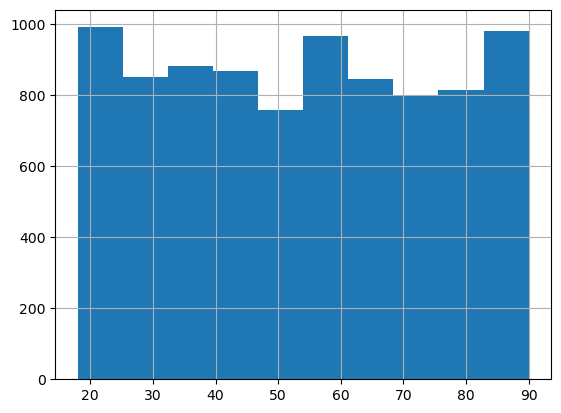

In [36]:
print(f"Histogram:{data['Age'].hist()}")

In [37]:
data['Cholesterol'].describe()

count    8763.000000
mean      259.877211
std        80.863276
min       120.000000
25%       192.000000
50%       259.000000
75%       330.000000
max       400.000000
Name: Cholesterol, dtype: float64

Histogram:Axes(0.125,0.11;0.775x0.77)


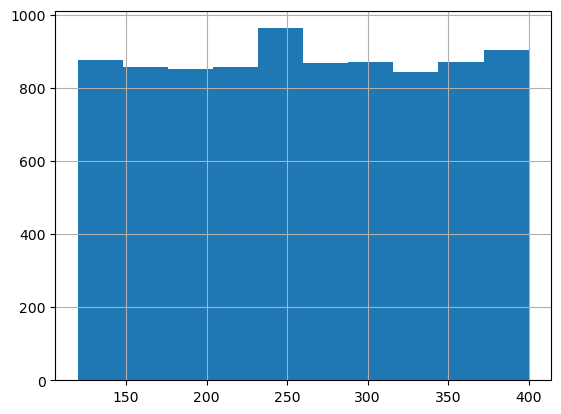

In [38]:
print(f"Histogram:{data['Cholesterol'].hist()}")

In [39]:
data['Heart Rate'].describe()

count    8763.000000
mean       75.021682
std        20.550948
min        40.000000
25%        57.000000
50%        75.000000
75%        93.000000
max       110.000000
Name: Heart Rate, dtype: float64

Histogram:Axes(0.125,0.11;0.775x0.77)


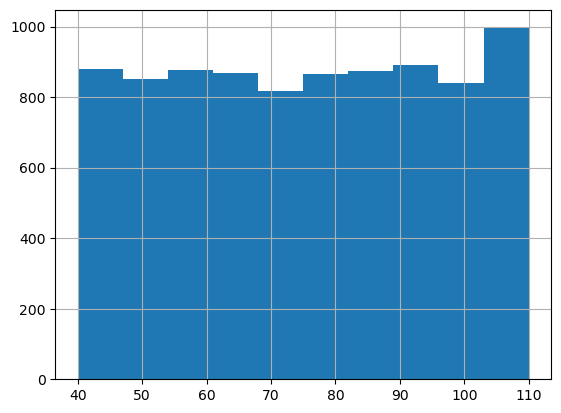

In [40]:
print(f"Histogram:{data['Heart Rate'].hist()}")

In [41]:
data['Exercise Hours Per Week'].describe()

count    8763.000000
mean       10.014284
std         5.783745
min         0.002442
25%         4.981579
50%        10.069559
75%        15.050018
max        19.998709
Name: Exercise Hours Per Week, dtype: float64

Histogram:Axes(0.125,0.11;0.775x0.77)


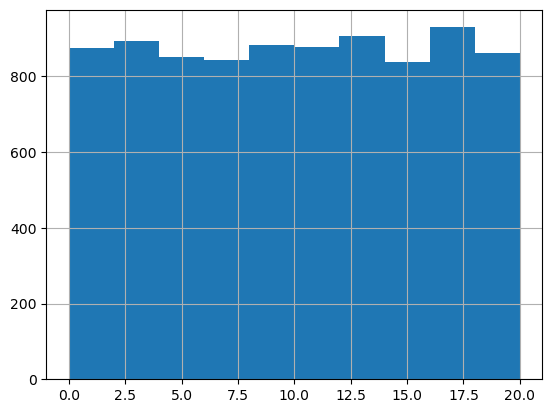

In [42]:
print(f"Histogram:{data['Exercise Hours Per Week'].hist()}")

In [43]:
data['Stress Level'].describe()

count    8763.000000
mean        5.469702
std         2.859622
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Stress Level, dtype: float64

Histogram:Axes(0.125,0.11;0.775x0.77)


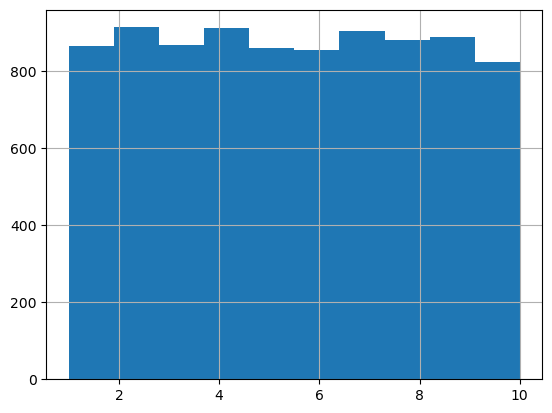

In [44]:
print(f"Histogram:{data['Stress Level'].hist()}")

In [45]:
data['Sedentary Hours Per Day'].describe()

count    8763.000000
mean        5.993690
std         3.466359
min         0.001263
25%         2.998794
50%         5.933622
75%         9.019124
max        11.999313
Name: Sedentary Hours Per Day, dtype: float64

Histogram:Axes(0.125,0.11;0.775x0.77)


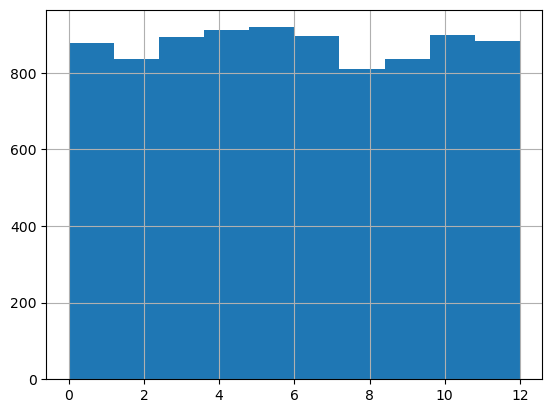

In [46]:
print(f"Histogram:{data['Sedentary Hours Per Day'].hist()}")

In [47]:
data['Income'].describe()

count      8763.000000
mean     158263.181901
std       80575.190806
min       20062.000000
25%       88310.000000
50%      157866.000000
75%      227749.000000
max      299954.000000
Name: Income, dtype: float64

Histogram:Axes(0.125,0.11;0.775x0.77)


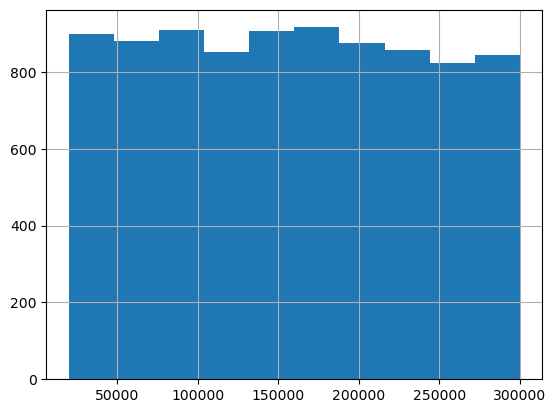

In [48]:
print(f"Histogram:{data['Income'].hist()}")

In [49]:
data['BMI'].describe()

count    8763.000000
mean       28.891446
std         6.319181
min        18.002337
25%        23.422985
50%        28.768999
75%        34.324594
max        39.997211
Name: BMI, dtype: float64

Histogram:Axes(0.125,0.11;0.775x0.77)


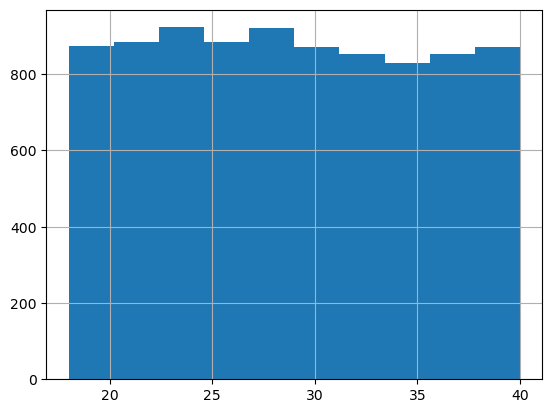

In [50]:
print(f"Histogram:{data['BMI'].hist()}")

In [51]:
data['Triglycerides'].describe()

count    8763.000000
mean      417.677051
std       223.748137
min        30.000000
25%       225.500000
50%       417.000000
75%       612.000000
max       800.000000
Name: Triglycerides, dtype: float64

Histogram:Axes(0.125,0.11;0.775x0.77)


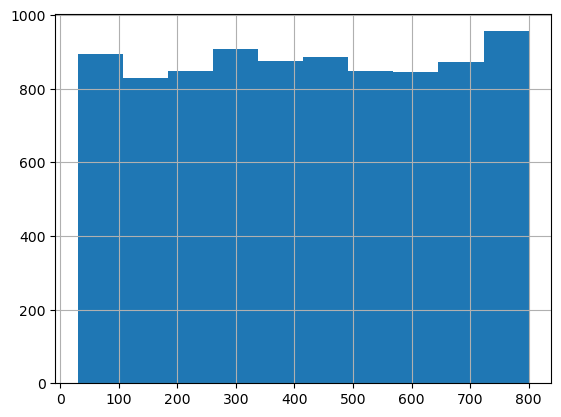

In [52]:
print(f"Histogram:{data['Triglycerides'].hist()}")

In [53]:
data['Physical Activity Days Per Week'].describe()

count    8763.000000
mean        3.489672
std         2.282687
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         7.000000
Name: Physical Activity Days Per Week, dtype: float64

Histogram:Axes(0.125,0.11;0.775x0.77)


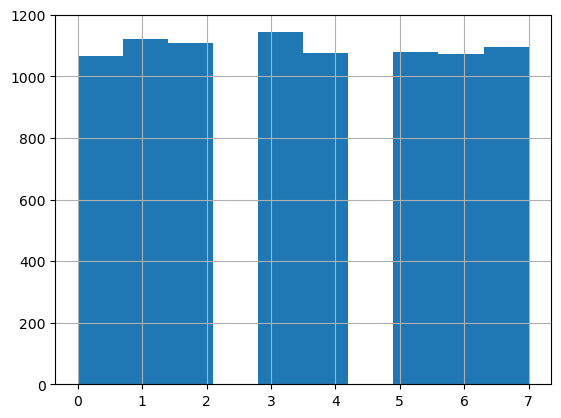

In [54]:
print(f"Histogram:{data['Physical Activity Days Per Week'].hist()}")

In [55]:
data['Sleep Hours Per Day'].describe()

count    8763.000000
mean        7.023508
std         1.988473
min         4.000000
25%         5.000000
50%         7.000000
75%         9.000000
max        10.000000
Name: Sleep Hours Per Day, dtype: float64

Histogram:Axes(0.125,0.11;0.775x0.77)


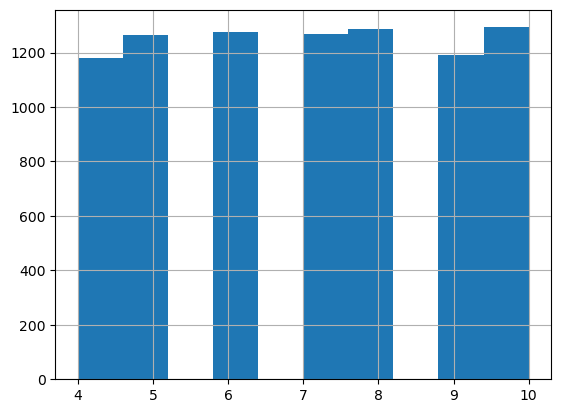

In [56]:
print(f"Histogram:{data['Sleep Hours Per Day'].hist()}")

#### Relação entre as variáveis